# 6610450871 นายชนพัฒน์ โชติกุลรัตน์ หมู่ 200

In [1]:
import zipfile
import os
import gdown
!gdown "https://drive.google.com/uc?id=1QLWyL4x_4ijgMJNj7Qoe4hfEr3eg5BZt"

zip_filename = '/content/Plant.zip'
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('/content')
os.remove(zip_filename)

Downloading...
From (original): https://drive.google.com/uc?id=1QLWyL4x_4ijgMJNj7Qoe4hfEr3eg5BZt
From (redirected): https://drive.google.com/uc?id=1QLWyL4x_4ijgMJNj7Qoe4hfEr3eg5BZt&confirm=t&uuid=2063611a-4310-447a-a6f0-7ceb97852aec
To: /content/Plant.zip
100% 220M/220M [00:02<00:00, 83.6MB/s]


In [16]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import os

In [13]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

def prepare_yolo_dataset(dataset_dir, output_dir, test_size=0.2, random_seed=1):

    class_labels = {
        "peonies": "peonies",
        "rose": "rose"
    }

    train_dir = os.path.join(output_dir, "train")
    val_dir = os.path.join(output_dir, "val")

    for class_name in class_labels.values():
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    image_paths = {class_name: [] for class_name in class_labels.values()}

    for img_name in os.listdir(dataset_dir):
        img_path = os.path.join(dataset_dir, img_name)

        for keyword, class_name in class_labels.items():
            if keyword in img_name.lower():
                image_paths[class_name].append(img_path)
                break  # Stop checking once a match is found

    # Split each class into train and validation
    for class_name, paths in image_paths.items():
        train_paths, val_paths = train_test_split(
            paths, test_size=test_size, random_state=random_seed
        )

        # Copy images to train/val directories
        for img_path in train_paths:
            shutil.copy(img_path, os.path.join(train_dir, class_name))
        for img_path in val_paths:
            shutil.copy(img_path, os.path.join(val_dir, class_name))

        print(f"{class_name}: {len(train_paths)} train, {len(val_paths)} val")

dataset_dir = "Plant"
output_dir = "yolo_dataset"
prepare_yolo_dataset(dataset_dir, output_dir)


peonies: 60 train, 15 val
rose: 59 train, 15 val


In [10]:
def load_images_from_paths(image_paths, target_size=(256, 256, 3)):
    images = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = img_array / 255.0
        images.append(img_array)
    return np.array(images)

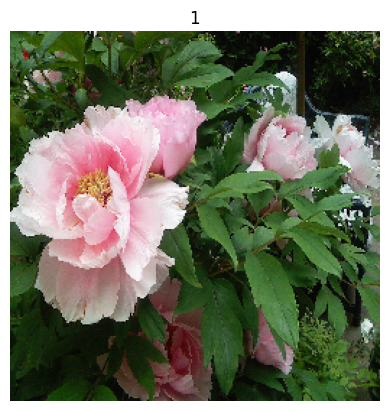

In [14]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

dataset_path = "/content/yolo_dataset/train/peonies"

img_filename = os.listdir(dataset_path)[0]
img_path = os.path.join(dataset_path, img_filename)
img = image.load_img(img_path, target_size=(256, 256,3))
img_array = image.img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.title(1)  # Display label as title
plt.axis("off")
plt.show()


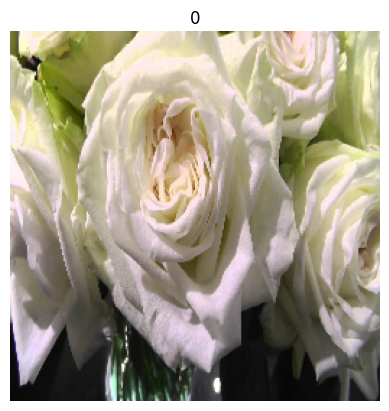

In [15]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

dataset_path = "/content/yolo_dataset/train/rose"

img_filename = os.listdir(dataset_path)[0]
img_path = os.path.join(dataset_path, img_filename)
img = image.load_img(img_path, target_size=(256, 256,3))
img_array = image.img_to_array(img)

plt.imshow(img_array.astype('uint8'))
plt.title(0)  # Display label as title
plt.axis("off")
plt.show()


In [21]:
import torch

print("Is CUDA available:", torch.cuda.is_available())
print("GPU device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None")


Is CUDA available: True
GPU device: Tesla T4


In [17]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [18]:
model = YOLO('yolov8n-cls.pt')

100%|██████████| 5.31M/5.31M [00:00<00:00, 187MB/s]


In [24]:
results = model.train(data="yolo_dataset",  # Your dataset configuration file
                      epochs=50,                # Number of training epochs
                      imgsz=640,                # Image size
                      batch=16,                 # Batch size
                      device=0)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=yolo_dataset, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/yolo_dataset/train... 119 images, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
val: Scanning /content/yolo_dataset/val... 30 images, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train5
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.38it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.92it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.73it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.14it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 10.82it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.60it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.39it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.18it/s]

                   all      0.833          1



      Epoch    GPU_mem       loss  Instances       Size


      10/50      1.57G    0.03233          7        640: 100%|██████████| 8/8 [00:14<00:00,  1.80s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.37it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      11/50      1.57G    0.08795          7        640: 100%|██████████| 8/8 [00:12<00:00,  1.53s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.29it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      12/50      1.57G    0.02727          7        640: 100%|██████████| 8/8 [00:13<00:00,  1.66s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      13/50      1.57G    0.08713          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 18.72it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      14/50      1.57G    0.09364          7        640: 100%|██████████| 8/8 [00:12<00:00,  1.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.72it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      15/50      1.57G    0.07814          7        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.51it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      16/50      1.57G    0.02758          7        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.15it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      17/50      1.57G    0.03771          7        640: 100%|██████████| 8/8 [00:12<00:00,  1.50s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      18/50      1.57G    0.03917          7        640: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.02it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      19/50      1.57G     0.2908          7        640: 100%|██████████| 8/8 [00:15<00:00,  2.00s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.11it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      20/50      1.57G    0.04435          7        640: 100%|██████████| 8/8 [00:11<00:00,  1.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      21/50      1.57G     0.1636          7        640: 100%|██████████| 8/8 [00:13<00:00,  1.65s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.94it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      22/50      1.57G    0.03881          7        640: 100%|██████████| 8/8 [00:17<00:00,  2.22s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 20.53it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      23/50      1.57G    0.05297          7        640: 100%|██████████| 8/8 [00:18<00:00,  2.37s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.97it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      24/50      1.57G    0.02845          7        640: 100%|██████████| 8/8 [00:14<00:00,  1.84s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.47it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      25/50      1.57G    0.04552          7        640: 100%|██████████| 8/8 [00:21<00:00,  2.68s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.09it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      26/50      1.57G     0.1655          7        640: 100%|██████████| 8/8 [00:17<00:00,  2.13s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 17.70it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      27/50      1.57G    0.07846          7        640: 100%|██████████| 8/8 [00:12<00:00,  1.62s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.10it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      28/50      1.57G    0.02914          7        640: 100%|██████████| 8/8 [00:16<00:00,  2.04s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.26it/s]

                   all      0.933          1



      Epoch    GPU_mem       loss  Instances       Size


      29/50      1.57G     0.0396          7        640: 100%|██████████| 8/8 [00:09<00:00,  1.20s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 11.28it/s]

                   all        0.9          1



      Epoch    GPU_mem       loss  Instances       Size


      30/50      1.57G     0.1077          7        640: 100%|██████████| 8/8 [00:16<00:00,  2.02s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.03it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      31/50      1.57G    0.02998          7        640: 100%|██████████| 8/8 [00:11<00:00,  1.49s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.63it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      32/50      1.57G    0.04688          7        640: 100%|██████████| 8/8 [00:19<00:00,  2.44s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.76it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      33/50      1.57G    0.01754          7        640: 100%|██████████| 8/8 [00:20<00:00,  2.56s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.98it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      34/50      1.57G    0.02816          7        640: 100%|██████████| 8/8 [00:24<00:00,  3.08s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.07it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      35/50      1.57G   0.007243          7        640: 100%|██████████| 8/8 [00:16<00:00,  2.02s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 13.77it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      36/50      1.57G    0.03052          7        640: 100%|██████████| 8/8 [00:20<00:00,  2.59s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.54it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      37/50      1.57G   0.004529          7        640: 100%|██████████| 8/8 [00:20<00:00,  2.58s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.45it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      38/50      1.57G    0.01999          7        640: 100%|██████████| 8/8 [00:31<00:00,  3.94s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.67it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      39/50      1.57G    0.01153          7        640: 100%|██████████| 8/8 [00:19<00:00,  2.43s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      40/50      1.57G    0.01864          7        640: 100%|██████████| 8/8 [00:15<00:00,  1.96s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 16.42it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      41/50      1.57G    0.02529          7        640: 100%|██████████| 8/8 [00:34<00:00,  4.29s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.41it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      42/50      1.57G    0.01353          7        640: 100%|██████████| 8/8 [00:23<00:00,  2.88s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      43/50      1.57G   0.006665          7        640: 100%|██████████| 8/8 [00:27<00:00,  3.40s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.95it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      44/50      1.57G    0.01244          7        640: 100%|██████████| 8/8 [00:17<00:00,  2.16s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.31it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      45/50      1.57G   0.007645          7        640: 100%|██████████| 8/8 [00:19<00:00,  2.43s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 12.45it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      46/50      1.57G   0.005667          7        640: 100%|██████████| 8/8 [00:24<00:00,  3.10s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.56it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      47/50      1.57G   0.007953          7        640: 100%|██████████| 8/8 [00:23<00:00,  2.98s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  6.71it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      48/50      1.57G    0.01115          7        640: 100%|██████████| 8/8 [00:25<00:00,  3.13s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  8.74it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      49/50      1.57G    0.01595          7        640: 100%|██████████| 8/8 [00:30<00:00,  3.86s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      50/50      1.57G    0.00856          7        640: 100%|██████████| 8/8 [00:25<00:00,  3.21s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00, 15.84it/s]

                   all      0.867          1



50 epochs completed in 0.267 hours.
Optimizer stripped from runs/classify/train5/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train5/weights/best.pt, 3.0MB

Validating runs/classify/train5/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/yolo_dataset/train... found 119 images in 2 classes ✅ 
val: /content/yolo_dataset/val... found 30 images in 2 classes ✅ 
test: None...


               classes   top1_acc   top5_acc: 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]


                   all      0.933          1
Speed: 0.9ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train5


In [25]:
metrics = model.val()
print(metrics)  # Shows accuracy, precision, recall, etc.


Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
train: /content/yolo_dataset/train... found 119 images in 2 classes ✅ 
val: /content/yolo_dataset/val... found 30 images in 2 classes ✅ 
test: None...


val: Scanning /content/yolo_dataset/val... 30 images, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:15<00:00,  7.64s/it]


                   all      0.933          1
Speed: 1.0ms preprocess, 14.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train52
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e1126d73d0>
curves: []
curves_results: []
fitness: 0.9666666686534882
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9333333373069763, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9666666686534882}
save_dir: PosixPath('runs/classify/train52')
speed: {'preprocess': 1.0437568028767903, 'inference': 13.96173636118571, 'loss': 0.0026146570841471353, 'postprocess': 0.004641215006510416}
task: 'classify'
top1: 0.9333333373069763
top5: 1.0


In [34]:
# Run prediction for the 'peonies' folder
results = model.predict("/content/yolo_dataset/val/peonies")

print(results)


image 1/15 /content/yolo_dataset/val/peonies/peonies_00013.jpg: 640x640 peonies 1.00, rose 0.00, 4.6ms
image 2/15 /content/yolo_dataset/val/peonies/peonies_00015.jpg: 640x640 peonies 1.00, rose 0.00, 4.8ms
image 3/15 /content/yolo_dataset/val/peonies/peonies_00020.jpg: 640x640 peonies 1.00, rose 0.00, 6.2ms
image 4/15 /content/yolo_dataset/val/peonies/peonies_00028.jpg: 640x640 peonies 0.83, rose 0.17, 4.4ms
image 5/15 /content/yolo_dataset/val/peonies/peonies_00032.jpg: 640x640 peonies 1.00, rose 0.00, 14.7ms
image 6/15 /content/yolo_dataset/val/peonies/peonies_00034.jpg: 640x640 peonies 1.00, rose 0.00, 16.7ms
image 7/15 /content/yolo_dataset/val/peonies/peonies_00037.jpg: 640x640 peonies 1.00, rose 0.00, 6.9ms
image 8/15 /content/yolo_dataset/val/peonies/peonies_00044.jpg: 640x640 peonies 1.00, rose 0.00, 13.5ms
image 9/15 /content/yolo_dataset/val/peonies/peonies_00046.jpg: 640x640 peonies 1.00, rose 0.00, 5.5ms
image 10/15 /content/yolo_dataset/val/peonies/peonies_00049.jpg: 640x

In [35]:
# Run prediction for the 'peonies' folder
results = model.predict("/content/yolo_dataset/val/rose")

print(results)


image 1/15 /content/yolo_dataset/val/rose/garden_roses_00003.jpg: 640x640 rose 0.99, peonies 0.01, 6.0ms
image 2/15 /content/yolo_dataset/val/rose/garden_roses_00006.jpg: 640x640 rose 0.90, peonies 0.10, 5.9ms
image 3/15 /content/yolo_dataset/val/rose/garden_roses_00011.jpg: 640x640 rose 1.00, peonies 0.00, 3.8ms
image 4/15 /content/yolo_dataset/val/rose/garden_roses_00015.jpg: 640x640 rose 0.99, peonies 0.01, 3.8ms
image 5/15 /content/yolo_dataset/val/rose/garden_roses_00016.jpg: 640x640 rose 1.00, peonies 0.00, 3.5ms
image 6/15 /content/yolo_dataset/val/rose/garden_roses_00017.jpg: 640x640 rose 0.87, peonies 0.13, 3.5ms
image 7/15 /content/yolo_dataset/val/rose/garden_roses_00019.jpg: 640x640 rose 1.00, peonies 0.00, 3.9ms
image 8/15 /content/yolo_dataset/val/rose/garden_roses_00034.jpg: 640x640 peonies 1.00, rose 0.00, 3.6ms
image 9/15 /content/yolo_dataset/val/rose/garden_roses_00038.jpg: 640x640 rose 1.00, peonies 0.00, 3.5ms
image 10/15 /content/yolo_dataset/val/rose/garden_rose